In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Neural Network to train simple data
# 
# Data:
# 0 0 1 | 0
# 0 1 1 | 1
# 1 0 1 | 1
# 1 1 1 | 0
# 
# Fully connected network from 3 input nodes to 4 hidden nodes to 1 output node.

In [3]:
# Sigmoid
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def dsigmoid(a):
    return sigmoid(a) * (1 - sigmoid(a))

In [4]:
# Initialize data
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
Y = np.array([[0, 1, 1, 0]]).T

print(X)
print(Y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]


In [60]:
# Initialize random weights
w1 = np.random.normal(size=(3, 4))
w2 = np.random.normal(size=(4, 1))

print(w1)
print(w2)

[[ 1.7356161   0.32111283  0.15859614  1.29528787]
 [ 1.54372903 -2.30019318 -0.13930838 -1.47676439]
 [ 1.73336569  0.37764165  0.99922236  1.80150347]]
[[-1.03948011]
 [ 1.03957656]
 [ 0.26301323]
 [ 0.43290744]]


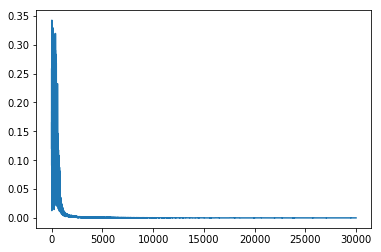

In [61]:
# For updating weights on a single x
def update():
    # Initialize global variables
    global w1
    global w2
    # Select random data point
    index = np.random.randint(len(X))
    x = X[index].reshape((1, -1))
    y = Y[index]
    # Forward propagation
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    c = (a2 - y) ** 2 / 2
    # Backward propagation
    dc = 1
    da2 = a2 - y
    dz2 = da2 * dsigmoid(z2)
    dw2 = a1.T.dot(dz2)
    da1 = dz2 * w2.T
    dz1 = da1 * dsigmoid(z1)
    dw1 = x.T.dot(dz1)
    w1 -= dw1
    w2 -= dw2
    return c

points = []
for i in range(30000):
    points.append(float(update()))
plt.plot(points)
plt.show()

In [66]:
new_data = np.array([[0, 0, 0]])
z1 = new_data.dot(w1)
a1 = sigmoid(z1)
z2 = a1.dot(w2)
a2 = sigmoid(z2)
print(float(a2))

0.9504542767060707
